In [2]:
#prvi zadatak
import numpy as np

def generate_data(n):
    
    #prva klasa
    n1 = int(n/2)
    x1_1 = np.random.normal(0.0, 2, (n1,1))
    #x1_1 = .21*(6.*np.random.standard_normal((n1,1))); 
    x2_1 = np.power(x1_1,2) + np.random.standard_normal((n1,1))
    y_1 = np.zeros([n1,1])
    temp1 = np.concatenate((x1_1,x2_1,y_1),axis = 1)
    
    #druga klasa
    n2 = int(n - n/2)
    x_2 = np.random.multivariate_normal((0,10), [[0.8,0],[0,1.2]], n2)
    y_2 = np.ones([n2,1])
    temp2 = np.concatenate((x_2,y_2),axis = 1)
    
    data  = np.concatenate((temp1,temp2),axis = 0)
    
    #permutiraj podatke
    indices = np.random.permutation(n)    
    data = data[indices,:]
    
    return data

np.random.seed(242)
dataTrain=generate_data(200)
np.random.seed(12)
dataTest=generate_data(100)

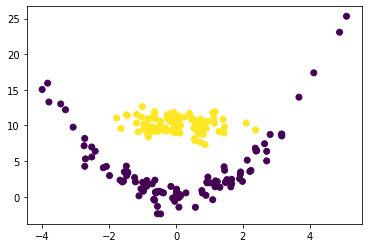

In [3]:
#drugi zadatak
import matplotlib.pyplot as plt
plt.scatter(dataTrain[:,0],dataTrain[:,1],c=dataTrain[:,2])

In [4]:
#treci zadatak
import sklearn as sl
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(dataTrain[:, 0:2], dataTrain[:,2])

xp = np.array([dataTrain[:,0].min(), dataTrain[:,0].max()])
yp1 = -model.coef_[0][0]/model.coef_[0][1] * xp[0] - model.intercept_[0]/model.coef_[0][1]
yp2 = -model.coef_[0][0]/model.coef_[0][1] * xp[1] - model.intercept_[0]/model.coef_[0][1]
yp = np.array([yp1,yp2])

#plt.scatter(yp[:,0],yp[:,1])
plt.scatter(dataTrain[:,0],dataTrain[:,1],c=dataTrain[:,2])
plt.plot(xp,yp)
plt.xlabel('x1')
plt.ylabel('x2')

Text(0, 0.5, 'x2')

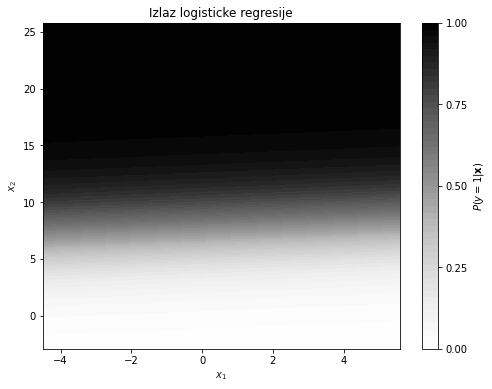

In [5]:
#cetvrti zadatak
f, ax = plt.subplots(figsize=(8, 6))
x_grid, y_grid = np.mgrid[min(dataTrain[:,0])-0.5:max(dataTrain[:,0])+0.5:.05,
                          min(dataTrain[:,1])-0.5:max(dataTrain[:,1])+0.5:.05]
grid = np.c_[x_grid.ravel(), y_grid.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(x_grid.shape)

cont = ax.contourf(x_grid, y_grid, probs, 60, cmap="Greys", vmin=0, vmax=1)

ax_c = f.colorbar(cont)
ax_c.set_label("$P(y = 1|\mathbf{x})$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.set_xlabel('$x_1$', alpha=0.9)
ax.set_ylabel('$x_2$', alpha=0.9)
ax.set_title('Izlaz logisticke regresije')
plt.show()



Text(0, 0.5, 'x2')

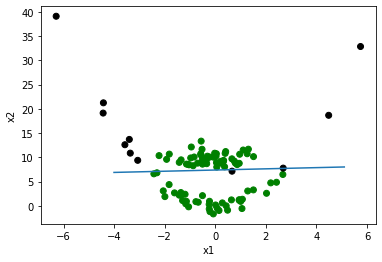

In [6]:
#peti zadatak
from matplotlib.colors import LinearSegmentedColormap
probability=model.predict(dataTest[:, 0:2])
plt.scatter(dataTest[:,0],dataTest[:,1],c=dataTest[:,2] == probability, cmap = LinearSegmentedColormap.from_list('mycmap', ['black', 'green']))
plt.plot(xp, yp)
plt.xlabel('x1')
plt.ylabel('x2')

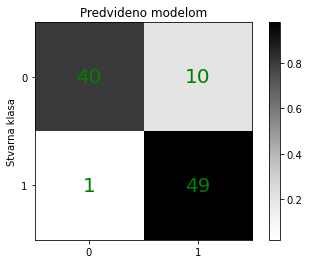

Accuracy: 0.89
Missclasification rate: 0.10999999999999999
Precision: 0.8305084745762712
Recall: 0.98
Specificity: 0.8


In [7]:
#sesti zadatak
import sklearn.metrics as metrics
def plot_confusion_matrix(c_matrix):
    
    norm_conf = []
    for i in c_matrix:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.Greys, interpolation='nearest')

    width = len(c_matrix)
    height = len(c_matrix[0])

    for x in range(width):
        for y in range(height):
            ax.annotate(str(c_matrix[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center', color = 'green', size = 20)

    fig.colorbar(res)
    numbers = '0123456789'
    plt.xticks(range(width), numbers[:width])
    plt.yticks(range(height), numbers[:height])
    
    plt.ylabel('Stvarna klasa')
    plt.title('Predvideno modelom')
    plt.show()


matrix=metrics.confusion_matrix(dataTest[:,2],probability)
plot_confusion_matrix(matrix)
tn, fp, fn, tp = matrix.ravel()
accuracy = (tp+tn) / (tp+tn+fp+fn)
missclasification_rate = 1 - accuracy
precision = tp / (tp+fp)
recall = tp / (tp+fn)
specificity = tn / (tn+fp)

print('Accuracy:', str(accuracy))
print('Missclasification rate:', str(missclasification_rate))
print('Precision:', str(precision))
print('Recall:', str(recall))
print('Specificity:', str(specificity))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


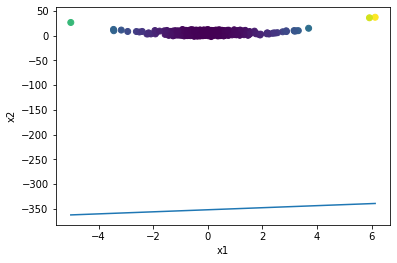

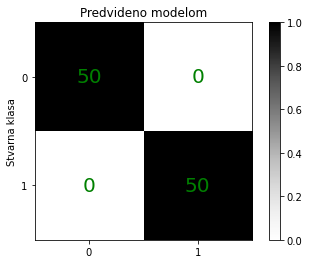

Accuracy: 1.0
Missclasification rate: 0.0
Precision: 1.0
Recall: 1.0
Specificity: 1.0


In [15]:
#sedmi zadatak
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(240)
dataTrain = generate_data(200)
np.random.seed(12)
dataTest = generate_data(100)


 
poly = PolynomialFeatures(degree=3, include_bias = False)
data_train_new = poly.fit_transform(dataTrain[:,0:2])

#3
modelExpanded=LogisticRegression()
modelExpanded.fit(data_train_new, dataTrain[:,2])

xp = np.array([data_train_new[:,0].min(), data_train_new[:,0].max()])
yp1 = -model.coef_[0][0]/model.coef_[0][1] * xp[0] - model.intercept_[0]/model.coef_[0][1]
yp2 = -model.coef_[0][0]/model.coef_[0][1] * xp[1] - model.intercept_[0]/model.coef_[0][1]
yp = np.array([yp1,yp2])


plt.scatter(data_train_new[:,0],data_train_new[:,1],c=data_train_new[:,2])
plt.plot(xp,yp)
plt.xlabel('x1')
plt.ylabel('x2')

#4
f, ax = plt.subplots(figsize=(8, 6))
x_grid, y_grid = np.mgrid[min(dataTrain[:,0])-0.5:max(dataTrain[:,0])+0.5:.05,
                          min(dataTrain[:,1])-0.5:max(dataTrain[:,1])+0.5:.05]
grid = np.c_[x_grid.ravel(), y_grid.ravel()]
grid = poly.fit_transform(grid)
probs = modelExpanded.predict_proba(grid)[:, 1].reshape(x_grid.shape)
cont = ax.contourf(x_grid, y_grid, probs, 60, cmap="Greys", vmin=0, vmax=1)
ax_c = f.colorbar(cont)
ax_c.set_label("$P(y = 1|\mathbf{x})$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.set_xlabel('$x_1$', alpha=0.9)
ax.set_ylabel('$x_2$', alpha=0.9)
ax.set_title('Izlaz logisticke regresije')
plt.show()

#5
data_test_new = poly.fit_transform(dataTest[:,0:2])
probabilityExpanded=modelExpanded.predict(data_test_new)
plt.scatter(data_test_new[:,0],data_test_new[:,1],c=dataTest[:,2] == probability, cmap = LinearSegmentedColormap.from_list('mycmap', ['black', 'green']))
plt.plot(xp, yp)
plt.xlabel('x1')
plt.ylabel('x2')

#6
matrix=metrics.confusion_matrix(dataTest[:,2],probabilityExpanded)
plot_confusion_matrix(matrix)
tn, fp, fn, tp = matrix.ravel()
accuracy = (tp+tn) / (tp+tn+fp+fn)
missclasification_rate = 1 - accuracy
precision = tp / (tp+fp)
recall = tp / (tp+fn)
specificity = tn / (tn+fp)

print('Accuracy:', str(accuracy))
print('Missclasification rate:', str(missclasification_rate))
print('Precision:', str(precision))
print('Recall:', str(recall))
print('Specificity:', str(specificity))

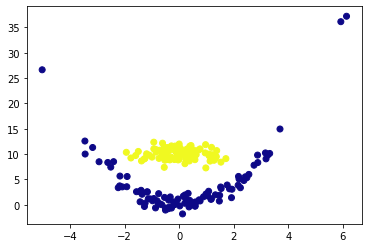

In [17]:
#osmi zadatak
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale

def plot_KNN(KNN_model, X, y):
    
    dataTrain_min, dataTrain_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(dataTrain_min, dataTrain_max, 0.01),
                         np.arange(x2_min, x2_max, 0.01))
         
    Z1 = KNN_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z1.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap='PiYG', vmin = -2, vmax = 2)
    plt.scatter(X[:,0], X[:,1], c = y, s = 30, marker= 'o' , cmap='RdBu',  edgecolor='white', label = 'train')


np.random.seed(240)
dataTrain = generate_data(200)
np.random.seed(12)
dataTest = generate_data(100)

plt.figure()
plt.scatter(dataTrain[:,0], dataTrain[:,1], c=dataTrain[:,2], cmap='plasma')

dataTrainscaled = scale(dataTrain[:,0:2])
dataTestscaled = scale(dataTest[:,0:2])
modelKnn = KNeighborsClassifier()
modelKnn.fit(dataTrainscaled, dataTrain[:,2])
preds = modelKnn.predict(dataTestscaled)

plot_KNN(modelKnn, dataTrainscaled, dataTrain[:,2])

confusionMatrix_knn = metrics.confusion_matrix(dataTest[:,2], preds)
plot_confusion_matrix(confusionMatrix_knn)
